# Analyzing parliamentary debates
## what are politicians really saying?

**Authors:** *(name // student id)*  
Quinten Bolding // 11290889,
Marten Rozema // .. ,
Jullotte van der Beek // .. &
Savina .. // ..

## Table of Contents

* [1. Introduction](#introduction1)
* [X Differences in political ideology based on sentiment analysis](#question_X)
    * [X.1. Introduction research question](#sectionX_1)
        * [X.1.1. Motivation](#sectionX_1_1)
        * [X.1.2. Related literature](#sectionX_1_1)
    * [X.2. Experimental setup](#sectionX_2)
        * [X.2.1. Dataset and Preprocessing](#sectionX_2_1)
            * [X.2.1.1. Note on Data and biases](#sectionX_2_1_1)
            * [X.2.1.2. Preliminaries](#sectionX_2_1_2)
            * [X.2.1.3. Preprocessing](#sectionX_2_1_3)
        * [X.2.2. Approach](#sectionX_2_2)
        * [X.2.3. Implementation](#sectionX_2_3)
    * [X.3. Findings](#sectionX_3)
        * [X.3.1. Results part 1](#sectionX_3_1)
        * [X.3.2. Interpretation part 1](#sectionX_3_2)
        * [X.3.3. Results part 2](#sectionX_3_3)
        * [X.3.4. Interpretation part 2](#sectionX_3_4)
    * [X.4. Discussion](#sectionX_4)
        * [X.4.1. Conclusion](#sectionX_4_1)
        * [X.4.2. Discussion results and suggestions future work](#sectionX_4_2)
        * [X.4.3. Lessons learned](#sectionX_4_3)
* [Y. References](#referencesY)
    * [Y.X. References RQX](#referencesY_X)

## Introduction <a class="anchor" id="introduction1"></a>

Nowadays we see the implementation of data analysis on almost every level. It is important to different companies, researchers, governments and so on. However there are still fields that are not so compatible with data analysis, such as politics. Politics is not based on numbers or labels. Politics base lies in the people affiliated with it and their communication between eachother. This means to describe it we can not always turn to our standard numerical data and have to avert to Natural Language Processing or NLP. With the help of NLP we can get a clearer sense what is happening in our politic landscape and get a better understanding who we could count on. 

The Dutch parliament is chosen in a parliamentaric democratic manner. This means that there are many parties with a lot of different views. This still does not mean that the biggest party would rule on its own, but that they have to form a coalition with other parties to reach a majority of the seats in the house of representatives. In this process the parties that want to be part of this coalition will meet with eachother and try to compromise until they can agree that they could work together to rule the Netherlands. This means that many of point of their program during the campaign will never make it in effect. 
With half of the pandemic behind us and people having to suffer some loss of freedom in order to preserve the health of the country, they are eager to vote so their voice is represented in the upcoming parliament. The problem is that many people do not know for which party to vote, also because many of the campaign gets lost when forming a coalition.

Therefore it would be useful to get a more clear idea of parties their preferences and opinions while already in the house of representatives and to find the right information about how the parties approach different topics in practice. Luckily CLARIN, a distributed digital infrastructure with participants from different European institutes, had roughly the same idea on a continental scale. It started their ParlaMint project that aims to provide is a verified communication channel between the elected political representatives and society members in any democracy. Their mission in the ParlaMint project is to  turn multilingual and diverse parliamentary data into coparable and interpretable resources. 

With upcoming elections in mind, this notebook aims to show how NLP can be used to provide information about the Dutch political landscape. Especially regarding the parties that were included in the house of representatives. With 4 different research questions we hope to provide an extensive overview of sentiment, topics and framing.

# X Differences in political ideology based on sentiment analysis <a class="anchor" id="question_X"></a>

## X.1. Introduction research question <a class="anchor" id="sectionX_1"></a>

### X.1.1. Motivation <a class="anchor" id="sectionX_1_1"></a>

Every year a lot of the political debates and meetings are transcripted, resulting in a large source of information and data about the political landscape. It is often hard for people to process all this data and listen to every debate. Nevertheless these debates and the information they hold can be crucial in the process of forming a conclusion about the political opinions of certain parties and individuals. Fortunately we live in a time where a lot of work can be automated using the machines and technologies that are available today. Natural language processing allows us to extract and mine valuable information out of text based datasets. For example, a lot can be learned from sentiment analysis of texts. These analyses allow us to turn text into sentiment scores which can then be used in measurements. Since the Ideological leanings of an individual can often be gauged by the sentiment one expresses about different issues, it might be possible to let computers determine ideological leanings about certain topics from sentiment analyses (Bhatia & P, 2018, p.79). 
Furthermore within the last year a lot of the political debates and meetings in the Dutch parliament have been about the SARS-CoV-2 (severe acute respiratory syndrome coronavirus) virus, resulting in a lot of data about one certain topic. While this topic was widely discussed, politicians have often adjusted their stance on the matter. Thus a good understanding of their ideology has been hard to detect for people. The data which has been documented during these times of discussion however could detect political ideology based on the sentiment scores that are analysed from it. Which would lead to the question: ‘What differences in political ideologies, based on the sentiment of dutch parliament parties on Covid-19 related topics, can be derived through the sentiment analysis of political debates?

### X.1.2. Related Literature <a class="anchor" id="sectionX1_2"></a>

Though very important, the topic of detection of political ideology has not been around for too long, nevertheless related research has been done. Bhatia and P (2018) have used a corpus of political documents such as speeches or social media postings to determine the sentiment on certain topics, which would then allow them to detect ideologies with promising results. Furthermore in the research of Beissmann et al. (2016) bag-of-word-functions were used to detect political ideologies based on the analyses of German parliament speeches and social media messages. Iyyer et al. (2014) used recursive neural networks to identify certain ideology biases in sentences. Last of all Sim et al. (2013) proposed a different method which uses so-called ‘ideology lexicons’, which they used to analyse political speeches. 
	The research that has been discussed upon till now mainly focussed on datasets in which political characters or parties were analysed, but more research about the detection ideology from text analysis has been done. Schwarz (2019) proposes three different methods to predict political ideologies from text, one of which is focused on the prediction of political ideologies from data which includes 500 self labelled youtube comments. Furthermore Lazaridou and Krestel (2016) used new articles from the Guardian and the Telegraph to detect political bias. 

## X.2. Experimental setup <a class="anchor" id="sectionX_2"></a>

### X.2.1. Dataset and Preprocessing <a class="anchor" id="sectionX_2_1"></a>

**X.2.1.1. Note on Data and biases** <a class="anchor" id="sectionX_2_1_1"></a>

The data used in this research contains the parliamentary debates from february 2020 till november 2020. The dataset focusses only on the period during Covid-19. The dataset contains .xml files in which information such as the date, the location, the speaker, the party to which the speaker is affiliated and the transcripted text, denoting what the speaker has said, along with other information are available in these files. Since in this research the text and the speakers will be the main focus some biases most be addressed.

First of all the so-called ‘streetlight effect’ where we only look where the light is. Since the questions in this research are all related to specific topics there will be a lot of looking in areas of which it would be reasonable to think that something could be found there. This might result in a biased selection of texts, which will be analyzed. To avoid this from happening the selected areas must be as diverse as possible, while still focussing on the relevant topic.

Second of all there might be a chance that the software used to analyze the text will miss certain grammatical units. Since the texts that are being analyzed will be almost entirely in Dutch, there is a chance of missing certain grammatical exceptions. Remembering that these tools will not be 100 percent accurate when interpreting the results will be crucial for the correct interpretation.

Last of all, since we deal with a large amount of data spread over a large amount of time, we need to be aware that the possible correlations found may be the result of confounding variables. We need to consider previous related research and be aware of the mistakes that can be made.



**X.2.1.2. Preliminaries** <a class="anchor" id="sectionX_2_1_2"></a>

The implementation presented in this resaerch relies on the pattern nlp tools and libraries, nltk nlp tools and libraries and Elementree tools, furhtermore the regex tool is used to edit text and pandas will be used to work with dataframes, last of all the matplotlib.pyplot library is being used to plot the results into graphs. You can get all of these by running the following code in your terminal:
```sh
pip install patter
pip install regex
pip install elementpath
pip install pandas
pip install matplotlib
pip install --user -U nltk
```
By importing the libraries as follows the code can be implemented correctly. Furthermore the some downloads from nltk are needed.

In [ ]:
import xml.etree.ElementTree as ET
import os
from pattern.nl import sentiment
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet as wn
from pattern.nl import pluralize
nltk.download('wordnet')
nltk.download('omw')

**X.2.1.3. Preprocessing** <a class="anchor" id="sectionX_2_1_3"></a>

We start by finding the root node of the xml file, here we can find some general information, but this will also be the start from where it allows you to iterate through it the dataset. Furthermore a dictionary is implemented to save the names of politicians as keys and their corresponding party. Since no politicians were in two different parties during the period of the debates this will not result in any problems later on. Last a list of parties is implemented to keep track of all the parties which occur in the data.

In [2]:
# creating a tree
tree = ET.parse("full_dataset_output_second_pass_16_01/ParlaMint-NL.xml")
# finding the root
root = tree.getroot()
# dict aanmaken voor de namen en hun partijen
namen = {}
# adding a list of all parties involved
partijen = []

With the for loop we can iterate through the nodes under the root node, this way we will pass all the tags in the file. In this part we search for the tag 'person' and since the header has to be in front of the search becomes '{http://www.tei-c.org/ns/1.0}person'. Each j in this case is now a branch in the xml tree with the person tag and  everything associated with it. the .attrib attachment ensures that everything, that is still in the tag, such as id, can be read. We deliberately put id behind it between brackets because that is where the names can be found. The try and except statements are used because for some of the politicians there is no party. An example of such a politician is Henk Krol. He has no party no party but does have a seat in the parliament. Next we look for the affiliation, as attrib 'ref' returns the name of the party. We skip the first seven elements with the [7:] slice, because there are some irrelevant chars in front of the name of the party.

In [3]:
for j in root.iter('{http://www.tei-c.org/ns/1.0}person'):
    # finding all names of politicians in the data
    naam = j.attrib['{http://www.w3.org/XML/1998/namespace}id']
    try:
        partij = j.find('{http://www.tei-c.org/ns/1.0}affiliation').attrib['ref'][7:]
    except AttributeError:
        partij = None
    except KeyError:
        partij = 'Chair'
    if partij not in partijen:
        partijen.append(partij)
    #Hier zet hij in de dict de naam als key met de gevonden partij erbij
    namen[naam] = partij

# list of all parties
print('List of all parties in the dataset:\n{}'.format(partijen))
print('Number of parties:', len(partijen))

#Example:
print('\nExample: When entering the name SigridKaag in the namen dictionary, the resulting party, that is returned, will be:')
namen['SigridKaag']

List of all parties in the dataset:
['Chair', 'VVD', 'SP', 'PvdA', 'CDA', 'PvdD', 'PVV', 'GroenLinks', 'SGP', 'D66', 'ChristenUnie', '50PLUS', None, 'OSF', 'DENK', 'Van Vliet', 'Groep Bontes/Van Klaveren', 'Houwers', 'Klein', 'Griffier', 'EP/VVD', 'EP/PvdA', 'EP/SP', 'EP/CDA', 'EP/D66', 'EP/GroenLinks', 'EP/CU/SGP', 'EP/PvdD', 'FvD', 'vanPareren']
Number of parties: 30

Example: When entering the name SigridKaag in the namen dictionary, the resulting party, that is returned, will be:


'D66'

Next all the statements and motions from the debates are read into a dictionary. The dictionary is a nested dictionary with the first two keys expressing if the text was transcripted during the Covid-19 pandemic or not. The second layer of keys denote all the parties and the things they have said. Hence the already given tags, pre and during Covid-19, for the dictionary texts, where everything will be written. With this tool the entire dataset is loaded as directory and iteration over each of the individual files is made possible, the directory is sorted so that the dates from old to new are in the correct order. The 'ParlaMint-NL.xml' check is used to skip the files with meta-data. Then a new path is made with the os.path.join function. A new tree is made for each debate file after which the file is parsed to find the text said per politician. By iterating through the root again we can search for the tags we want to use. It is set on the ''{http://www.tei-c.org/ns/1.0}u' tag, this tag returns the things that have been said by the politicians. The 'u' tag also contains some attributes, namely the 'ana' tag which indicates the type of speaker, chair or regular. Since we are not that interested in the chairman's statements, these statements will be skipped. In the 'u' tag however the statements aren't directly represented, therefore in the xml tree the child 'seg' is used to extract the text. In these seg's are the transcripted statements. Please note that here findall is used instead of find because every now and then there are more seg's under 1 speaker. If the 'tijd' variable indicates #reference then the statement is pre-covid if not then it is from during the pandemic. The statements are then added to the nested dictionary. First is checked whether the key, in this case the party is already there, so that he knows whether he has to append to the key or whether to create a new key. Then the names dict is cited here in order to save it for the party to which the politician is affiliated or was affiliated. Then behind it in brackets is text.attrib [who] [1:]. Here the text.attrib 'who' is the person's name and [1:] is the slice to remove the # before the name.

In [4]:
teksten = {'#reference':{},'#covid':{}}
directory = os.listdir('full_dataset_output_second_pass_16_01')

# looping through directory
for i in sorted(directory):
    
    if i == 'ParlaMint-NL.xml':
        continue
    
    # making new path
    i = os.path.join('full_dataset_output_second_pass_16_01', i)
    # making tree for xml file
    tree = ET.parse(i)
    # finding root
    root = tree.getroot()
    #voor de tijd of het tijdens covid was of niet zoek ik in de attributes van de root node
    tijd = root.attrib['ana']
    
    for text in root.iter('{http://www.tei-c.org/ns/1.0}u'):
        # skipping chair statements
        if text.attrib['ana'] == '#chair':
            continue
            
        # finding transcripts
        for seg in text.findall('{http://www.tei-c.org/ns/1.0}seg'):
            # pre-covid if tijd == #reference
            if tijd == '#reference':
                
                if namen[text.attrib['who'][1:]] in teksten[tijd].keys():
                    teksten[tijd][namen[text.attrib['who'][1:]]].append(seg.text)
                else:
                    teksten[tijd][namen[text.attrib['who'][1:]]] = [seg.text]
            # if tijd == #covid
            else:
                if namen[text.attrib['who'][1:]] in teksten[tijd].keys():
                    teksten[tijd][namen[text.attrib['who'][1:]]].append(seg.text)
                else:
                    teksten[tijd][namen[text.attrib['who'][1:]]] = [seg.text]
                    
# Example 1
print('An example of a statement made by the VVD during the pandemic:\n')
print(teksten['#covid']['VVD'][-1]+'\n')

# Example 2
print('An example of a statement made by the SGP in the pre-covid period:\n')
print(teksten['#reference']['SGP'][-1])

An example of a statement made by the VVD during the pandemic:

De motie die de heer Otten net voordroeg, bevat een misverstand, namelijk dat er tijdsdruk is. Ik heb u al aangegeven dat dit kabinet niet van plan is om met aanvullende maatregelen te komen, zoals hypotheekrenteaftrek. Maar er is ook geen tijdsdruk die ons noodzaakt om snel voor de verkiezingen met andere standpunten te komen. Die motie ontraad ik dus.

An example of a statement made by the SGP in the pre-covid period:

Daar sluit ik mij bij aan, voorzitter.


### X.2.2. Approach <a class="anchor" id="sectionX_2_2"></a>

In order to answer the question, sentiment analyses are made of the entire Covid-19 period, as a reference, of the statements in which Covid-19 related keywords are mentioned and of the statements, in which words related to one of three corona related topics are mentioned. Then the results from these sentiment analyses will be compared to see if any significant differences can be found. When there is an overall difference of more than 0.05, a significant difference between parties is found.

The firs step is selecting only the corona related content and comparing it to the sentiment of all the content during the Covid-19 period. This includes two sets; the first set concerning all the debates during the period of the pandemic and the second concerning only the debates in which certain keywords concerning the pandemic were mentioned. These keywords were selected from the ‘coronawoordenlijst’ which is a list of most of the dutch words concerning the virus and the pandemic made by Pharos, which is the national expertise center. Pharos contributes to reducing major health inequalities. The full list of keywords from the pharos ‘coronawoordenlijst’ can be found at https://www.pharos.nl/coronavirus/corona-woordenlijst/. Since the list made by Pharos also contains senses, these have been removed and only the keywords were selected. The decision to use this list, instead of making a list containing keywords, has been made because the Covid-19 related words have not been added to the word-net dictionary. Later on three different, more specific topics will be analyzed with the use of a self generated list for further reference.

### X.2.3. Implementation <a class="anchor" id="sectionX_2_3"></a>
The first objective is putting all the items from the 'corona-woordenlijst, which can be found at: https://www.pharos.nl/coronavirus/corona-woordenlijst/, into a list. When doing this the senses need to be ignored and onlyt keywords within those senses, if not allready in the list, need to be extracted. Since the list is not available as a downloadable file, this has to been done manually

In [100]:
keywords = ['aantoonbaar', 'afremmen', 'afvlakken', 'besmettingen' 'cdc', 'contactberoepen', 'complicaties', 'corona', 'corona-centers', 'corona-besmettingen', 'corona-crisis', 'crisis', 'corona-verspreiders', 'corona-virus', 'virus', 'verspreiding','crisis-beheersing', 'epidemie', 'boete', 'functioneren', 'getroffen', 'groepsimmuniteit', 'verklaring', 'groepsvorming', 'handhaving', 'incubatietijd', 'hoestschaamte', 'indicatie', 'influenza', 'capaciteit', 'ic', 'lockdown', 'isolatie', 'kweekstokje', 'luchtwegen', 'maximale', 'medicijn', 'minimaliseren', 'noodveroordening', 'ondergrens', 'omt', 'pandemie', 'patienten', 'gezondheid', 'quarantaine', 'risico-groep', 'risicogroepen', 'rivm', 'samenscholen', 'spoedtent', 'distancing', 'symptomen', 'uitbraak', 'umcg', 'vaccin', 'vaccinatie', 'vaccinaties', 'covid-19', 'sars-cov-2', 'veiligheidsregio', 'verpleeghuizen', 'viroloog', 'virusdreiging', 'vitale', 'voorschriften', 'who']

# printing number of keywords
print('\nNumber of keywords:', len(keywords))


Number of keywords: 65


After the list of keywords is completed the selection between text containing the keywords and all text had to be made. Using comparison between the words in the text and the list of keywords this differentiation can be made. Furthermore the sentiment of texts can be determined using the sentiment function from pattern. By adding the sentiment scores to differnt lists the difference can later be reviewed. Last of all two counters, to determine how often every party talks about the topic, are implemented.

In [108]:
# setting up empty lists for the x and y data
scores = []

for partij in partijen:
    # setting counters
    count1 = 0
    count2 = 0

    if partij in teksten['#covid']:
        # setting up empty lists for scores
        score1 = []
        score2 = []

        for tekst in teksten['#covid'][partij]:

            # ignoring none-types or other datatypes
            if isinstance(tekst, str):
                words = tekst.split()

                for word in words:
                    # removing punctuation
                    re.sub('[,\.!?]', '', word)
                    # setting words to lowercase
                    word.lower()

            # overall sentiment
            score2.append(sentiment(tekst))
            count2 += 1

            # focussing on keywords about covid-19
            check = any(item in words for item in keywords)

            if check == True:
                score1.append(sentiment(tekst))
                # checking number of tekst with keywords
                count1 += 1

        # checking per party
        scores.append([partij, np.mean(score1), np.std(score1), count1, np.mean(score2), np.std(score2), count2])

In this section the word lists concerning three diffirent topics that were widly discussed during the pandemic period are made using the wordnet nltk tool. The topics are: the catering industry, the economy and education or 'horeca', 'economie' and 'onderwijs' respectively. The list are first give several keywords, concerning the topic, to start with. This is done to broaden the reach of the list. Furthermore since only nouns are used, the pattern.nl pluralize function is used to make sure that the lists will also include the plural forms of the nouns. While adding words to the list, it is checked if the words are not allready in the list, in order to not further complicate the list and create only a list of unique words. The process is repeated three times for each of the topics.

In [101]:
wordlst_horeca = ['horeca','cafe', 'horeca','cafe', 'restaurant', 'kroeg', 'bediening']
keywords_horeca = ['horeca','cafe', 'restaurant', 'kroeg', 'bediening']

for word in keywords_horeca:
    wordlst_horeca.append(pluralize(word))
    syns = wordnet.synsets(word, lang='nld')
    
    # search for al synonyms and hyponyms
    for i in range (len(syns)):
        for j in range (len(syns[i].lemmas(lang='nld'))):
            # add word to list if not allready in it
            if syns[i].lemmas(lang='nld')[j].name() not in wordlst_horeca:
                wordlst_horeca.append(syns[i].lemmas(lang='nld')[j].name())
                wordlst_horeca.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))

print('List of words concerning the topic: horeca;\n{}'.format(wordlst_horeca))
print('Number of words in list:',len(wordlst_horeca))

wordlst_economie = ['economie', 'crisis', 'werkeloosheid', 'armoede', 'werk', 'ontslag']
keywords_economie = ['economie', 'crisis', 'werkeloosheid', 'armoede', 'werk', 'ontslag']

for word in keywords_economie:
    wordlst_economie.append(pluralize(word))
    syns = wordnet.synsets(word, lang='nld')
    
    # search for al synonyms and hyponyms
    for i in range (len(syns)):
        for j in range (len(syns[i].lemmas(lang='nld'))):
            # add word to list if not allready in it
            if syns[i].lemmas(lang='nld')[j].name() not in wordlst_economie:
                wordlst_economie.append(syns[i].lemmas(lang='nld')[j].name())
                wordlst_economie.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))

print('\nList of words concerning the topic: economie;\n{}'.format(wordlst_economie))
print('Number of words in list:',len(wordlst_economie))

wordlst_onderwijs = ['onderwijs', 'school', 'universiteit', 'basisschool']
keywords_onderwijs = ['onderwijs', 'school', 'universiteit', 'basisschool']

for word in keywords_onderwijs:
    wordlst_onderwijs.append(pluralize(word))
    syns = wordnet.synsets(word, lang='nld')
    
    # search for al synonyms and hyponyms
    for i in range (len(syns)):
        for j in range (len(syns[i].lemmas(lang='nld'))):
            # add word to list if not allready in it
            if syns[i].lemmas(lang='nld')[j].name() not in wordlst_onderwijs:
                wordlst_onderwijs.append(syns[i].lemmas(lang='nld')[j].name())
                wordlst_onderwijs.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))

print('\nList of words concerning the topic: onderwijs;\n{}'.format(wordlst_onderwijs))
print('Number of words in list:',len(wordlst_onderwijs))

List of words concerning the topic: horeca;
['horeca', 'cafe', 'horeca', 'cafe', 'restaurant', 'kroeg', 'bediening', "horeca's", 'cafes', 'hospies', 'hospiessen', 'pension', 'pensionen', 'herberg', 'herbergen', 'restauranten', 'eetcafe', 'eetcafes', 'eetgelegenheid', 'eetgelegenheden', 'eethuis', 'eethuizen', 'eettent', 'eettenten', 'kroegen', 'bar', 'barren', 'bierhuis', 'bierhuizen', 'cafeetje', 'cafeetjes', 'café', 'cafés', 'drankhol', 'drankhollen', 'dranklokaal', 'dranklokalen', 'pub', 'pubben', 'schenklokaal', 'schenklokalen', 'staminee', 'stamineën', 'stammenee', 'stammeneën', 'tapperij', 'tapperijen', 'taveerne', 'taveernes', 'bedieningen', 'wegrestaurant', 'wegrestauranten', 'dienst', 'diensten']
Number of words in list: 54

List of words concerning the topic: economie;
['economie', 'crisis', 'werkeloosheid', 'armoede', 'werk', 'ontslag', 'economies', 'doelmatigheid', 'doelmatigheden', 'doeltreffendheid', 'doeltreffendheden', 'effectiviteit', 'effectiviteiten', 'efficiëntie', 

In the following section the same method as before is applied to determine the sentiment concerning the three topics selected above. By comparing the text with the word lists, which can be seen above, we can identify which statements or texts concern the selected topics. Afterwards the sentiment of this text can be analysed and the scores can be saved. this way a representation of the sentiment of each party on each of the topics can be found.

In [102]:
# setting up empty lists for the x and y data
scores_topics = []

for partij in partijen:
    # setting counters
    counter1 = 0
    counter2 = 0
    counter3 = 0

    if partij in teksten['#covid']:
        # setting up empty lists for scores
        score1 = []
        score2 = []
        score3 = []

        for tekst in teksten['#covid'][partij]:

            # ignoring none-types or other datatypes
            if isinstance(tekst, str):
                words = tekst.split()

                for word in words:
                    # removing punctuation
                    re.sub('[,\.!?]', '', word)
                    # setting words to lowercase
                    word.lower()

            # focussing on keywords about covid-19
            check1 = any(item in words for item in wordlst_horeca)
            check2 = any(item in words for item in wordlst_economie)
            check3 = any(item in words for item in wordlst_onderwijs)
            
            if check1 == True:
                score1.append(sentiment(tekst))
                # checking number of tekst with keywords
                counter1 += 1
                
            if check2 == True:
                score2.append(sentiment(tekst))
                # checking number of tekst with keywords
                counter2 += 1
                
            if check3 == True:
                score3.append(sentiment(tekst))
                # checking number of tekst with keywords
                counter3 += 1

        # checking per party
        scores_topics.append([partij, np.mean(score1), np.std(score1), counter1, np.mean(score2), np.std(score2), counter2, np.mean(score3), np.std(score3), counter3])

## X.3. Findings <a class="anchor" id="sectionX_3"></a>

### X.3.1 Results part 1 <a class="anchor" id="sectionX_3_1"></a>
After extracting the sentiment from the relevant texts in the dataset the results can be plotted using the following code. The bar graphs indicate the average sentiment per party with standard deviations indicated by the black bars. The data over all parties for the statements selected with keywords is plotted by the blue bars and the data over all parties for all statements during the entire Covid-19 period is plotted by the orange bars. The mean over all parties for the statements selected with keywords is plotted by the red line and the mean over all parties for all statements during the entire Covid-19 period is plotted by the green line. In this section only the overall sentiment and the sentiment when focussing on keywords, for each party during the Covid-19 period, is shown. The more specific topics that were selected are plotted afterwards. The bar with no specified party belongs to the None section, which represent the statements released by no further specified party.

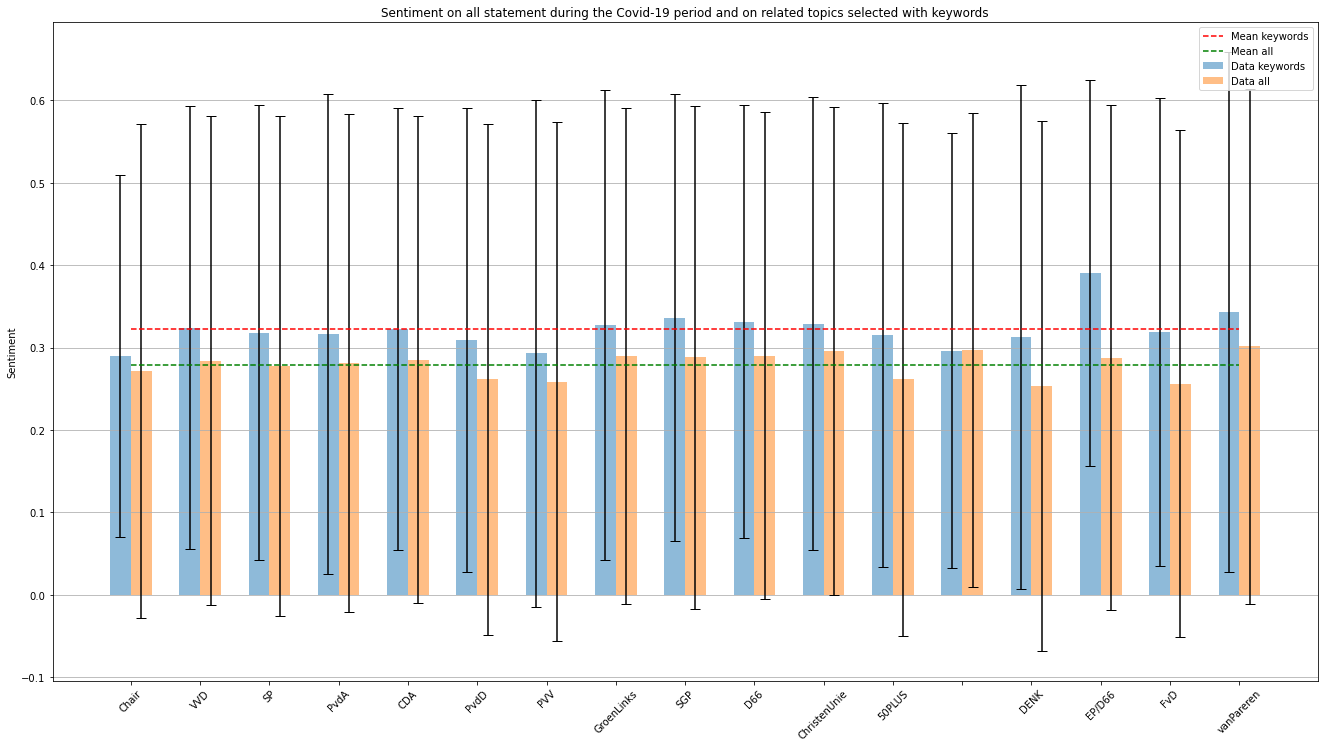

The maxima and minima from the results:
The party with the maximum sentiment score on corona related topics selected with keywords was: EP/D66 , with a score of: 0.39
The party with the maximum sentiment score on statements over the entire Covid-19 period was: vanPareren , with a score of: 0.30
The party with the minimum sentiment score on corona related topics selected with keywords was: Chair , with a score of: 0.29
The party with the minimum sentiment score on statements over the entire Covid-19 period was: DENK , with a score of: 0.25


,Party,Average sentiment keywords,Stdev sentiment keywords,N keywords,Average sentiment,Stddev sentiment,N
0,Chair,0.290133,0.219418,33,0.272021,0.299455,895
1,VVD,0.324059,0.268895,1527,0.284183,0.296492,21285
2,SP,0.317876,0.276100,615,0.277280,0.303134,8717
3,PvdA,0.316538,0.290786,494,0.281228,0.301531,6492
4,CDA,0.322559,0.267674,1478,0.285219,0.295224,19135
5,PvdD,0.309474,0.281130,341,0.261428,0.309773,4221
6,PVV,0.292915,0.307708,471,0.258629,0.315077,6957
7,GroenLinks,0.327162,0.285177,534,0.289925,0.301037,8393
8,SGP,0.336445,0.271575,177,0.288033,0.305365,3391
9,D66,0.331632,0.262867,855,0.290274,0.295201,15938


In [162]:
# when relaoding the scores in this cell the last added item will be total so to not add these scores in the graph
# we need to pop the last row, this is a temporary solution
scores.pop(-1)

# prep for plot
parties = [row[0] for row in scores]
x = np.arange(len(parties))

# plot of results of keyword related text
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
y1 = [row[1] for row in scores]
ax.bar(x-0.15, y1, yerr=[row[2] for row in scores], width=0.3, label='Data keywords', align='center', alpha=0.5, ecolor='black', capsize=5)
y2 = [row[4] for row in scores]
ax.bar(x+0.15, y2, yerr=[row[5] for row in scores], width=0.3, label='Data all', align='center', alpha=0.5, ecolor='black', capsize=5)

# adding mean line
avg_score1 = [np.mean(y1)]*len(x)
mean_line = ax.plot(x, avg_score1, label='Mean keywords', linestyle='--', color='red')

# adding mean line
avg_score2 = [np.mean(y2)]*len(x)
mean_line = ax.plot(x, avg_score2, label='Mean all', linestyle='--', color='green')

legend = ax.legend(loc='upper right')
ax.set_ylabel('Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(parties, rotation=45)
ax.set_title('Sentiment on all statement during the Covid-19 period and on related topics selected with keywords')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('plot_sent.png')

plt.show()

# adding total number of texts and means to represent in later df
scores.append(['Total', np.mean([row[1] for row in scores]), np.std([row[1] for row in scores]), np.sum([row[3] for row in scores]), np.mean([row[4] for row in scores]) , np.std([row[4] for row in scores]), np.sum([row[6] for row in scores])])

# df's with data
df_sent = pd.DataFrame(scores, columns=['Party', 'Average sentiment keywords','Stdev sentiment keywords', 'N keywords','Average sentiment', 'Stddev sentiment', 'N'])

print('The maxima and minima from the results:')
print('The party with the maximum sentiment score on corona related topics selected with keywords was:', parties[y1.index(max(y1))],', with a score of: %.2f' % max(y1))
print('The party with the maximum sentiment score on statements over the entire Covid-19 period was:', parties[y2.index(max(y2))],', with a score of: %.2f' % max(y2))

print('The party with the minimum sentiment score on corona related topics selected with keywords was:', parties[y1.index(min(y1))],', with a score of: %.2f' % min(y1))
print('The party with the minimum sentiment score on statements over the entire Covid-19 period was:', parties[y2.index(min(y2))],', with a score of: %.2f' % min(y2))

df_sent

### X.3.2. Interpretation part 1 <a class="anchor" id="sectionX_3_2"></a>

In the results that can be seen in the dataframe above, the 'party' column represents the party which released the statement, the 'average sentiment keywords' column represents the average sentiment on all texts in which a keyword was mentioned, the 'Stdev sentiment keywords' column represents the standard deviation of the sentiment of the texts in which keywords were mentioned, the 'N keywords' column represents the number of times any of the keywords were mentioned in the texts, the 'average sentiment' column represents the average sentiment on all texts, the 'Stdev sentiment' column represents the standard deviation of the sentiment of all texts and the 'N k' column represents the number of texts per party during the Covid-19 period. In the graphs this data is further represented for visualization.

As can be seen in the graphs above, the scores for the sentiment analysis, when targeted on the keywords, have a higher average result. This means that, when specifically focussing on text related to or about the current pandemic, the average sentiment is higher when politicians spoke about the virus than on average during the entire pandemic. Furthermore there were no real outliers in the data and this result is also the case for any individual party. Last of all the party which was the most positive overall is EP/D66 and the party which was the most negative overall is the PVV. Note that one party didn't receive a name, these statements belonged to the None type and where thus statements release by members of the parliament without a party.

### X.3.3. Results part 2 <a class="anchor" id="sectionX_3_3"></a>

In the next section the same plotting methods, as for the graphs above, are applied to the data resulting from the analyses of sentiment when focussing on the three differnt topics the colors are: blue for the data from the 'horeca' topic, blue for the data from the 'horeca' topic, orange for the data from the 'economie' topic and green for the data from the 'onderwijs' topic. Once again the bar with no specified party belongs to the None section, which represent the statements released by no further specified party. Furthermore there are some parties which didn't release statements on one of the specific topics during the Covid-19 period. Therefore no results are plotted for those topics and parties.

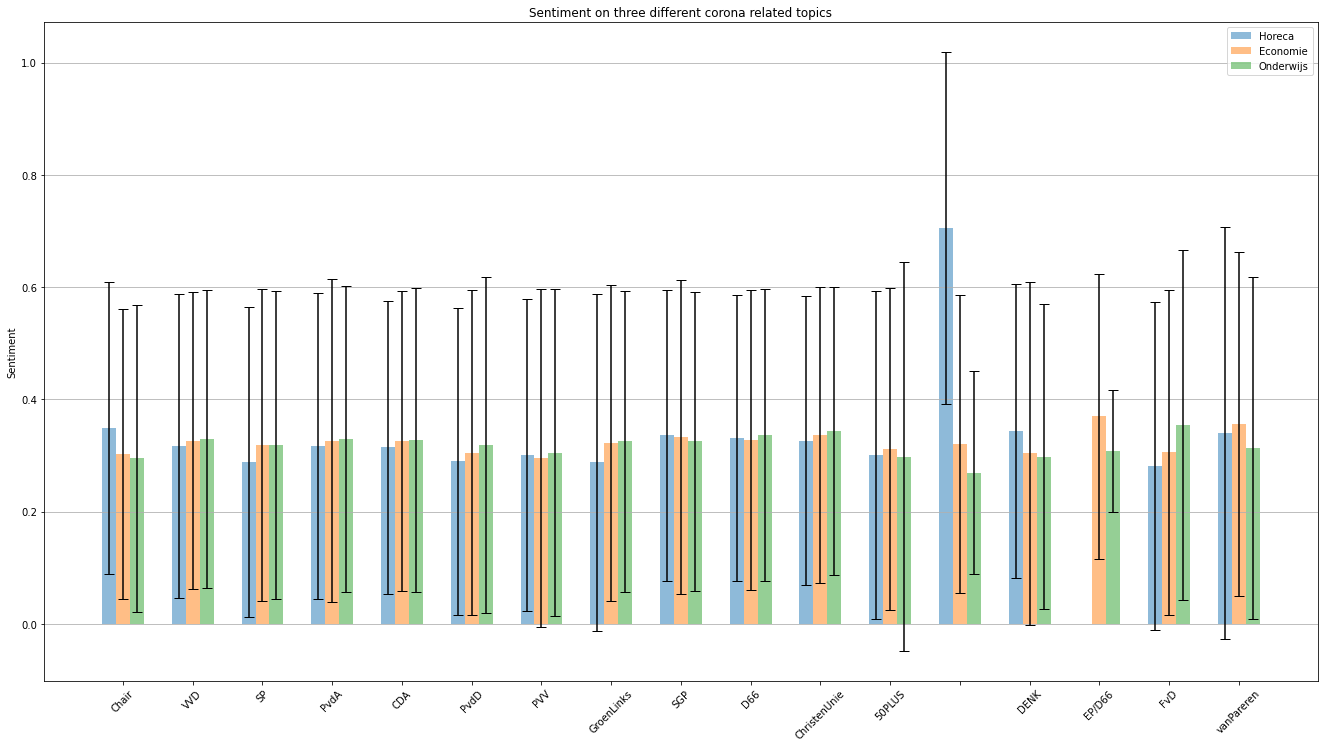

The maxima and minima from the results:
The party with the maximum sentiment score on the topic 'horeca' was: None , with a score of: 0.71
The party with the maximum sentiment score on the topic 'economie' was: EP/D66 , with a score of: 0.37
The party with the maximum sentiment score on the topic 'onderwijs' was: FvD , with a score of: 0.35

The party with the minimum sentiment score on the topic 'horeca' was: FvD , with a score of: 0.28
The party with the minimum sentiment score on the topic 'economie' was: PVV , with a score of: 0.30
The party with the minimum sentiment score on the topic 'onderwijs' was: None , with a score of: 0.27


,Party,Average sentiment on 'horeca',Stdev sentiment on 'horeca',N 'horeca',Average sentiment on 'economie',Stddev sentiment on 'economie',N 'economie',Average sentiment on 'onderwijs',Stddev sentiment on 'onderwijs',N 'onderwijs'
0,Chair,0.349392,0.260473,4,0.303395,0.258501,116,0.295148,0.273661,9
1,VVD,0.317531,0.271017,284,0.326565,0.264646,2958,0.328888,0.265607,645
2,SP,0.288417,0.275422,98,0.319619,0.277922,1128,0.318701,0.275092,341
3,PvdA,0.316878,0.272754,76,0.326529,0.287142,946,0.329970,0.272867,300
4,CDA,0.314353,0.260367,156,0.326393,0.267306,2360,0.327626,0.270031,399
5,PvdD,0.289436,0.273964,37,0.305081,0.289783,411,0.319310,0.299242,59
6,PVV,0.301178,0.277681,96,0.296222,0.301271,720,0.305226,0.291884,229
7,GroenLinks,0.287972,0.300378,66,0.323131,0.281461,1099,0.325282,0.268123,359
8,SGP,0.336294,0.259245,32,0.333541,0.279653,372,0.325239,0.266041,115
9,D66,0.331077,0.254423,224,0.327332,0.267626,2206,0.336127,0.259894,568


In [168]:
# when relaoding the scores in this cell the last added item will be total so to not add these scores in the graph
# we need to pop the last row, this is a temporary solution
scores_topics.pop(-1)

# prep for plot
parties = [row[0] for row in scores_topics]
x = np.arange(len(parties))

# plot of results of keyword related text
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
y1 = [row[1] for row in scores_topics]
ax.bar(x-0.2, y1, yerr=[row[2] for row in scores_topics], width=0.2, label='Horeca', align='center', alpha=0.5, ecolor='black', capsize=5)
y2 = [row[4] for row in scores_topics]
ax.bar(x, y2, yerr=[row[5] for row in scores_topics], width=0.2, label='Economie', align='center', alpha=0.5, ecolor='black', capsize=5)
y3 = [row[7] for row in scores_topics]
ax.bar(x+0.2, y3, yerr=[row[8] for row in scores_topics], width=0.2, label='Onderwijs', align='center', alpha=0.5, ecolor='black', capsize=5)

legend = ax.legend(loc='upper right')
ax.set_ylabel('Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(parties, rotation=45)
ax.set_title('Sentiment on three different corona related topics')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('plot_sent_topics.png')

plt.show()

# removing nan from col
cleancol = [i for i in [row[1] for row in scores_topics] if str(i) != 'nan']

# corresponding dataframe
scores_topics.append(['Total', np.mean([cleancol]), np.std([cleancol]), np.sum([row[3] for row in scores_topics]), np.mean([row[4] for row in scores_topics]) , np.std([row[4] for row in scores_topics]), np.sum([row[6] for row in scores_topics]), np.mean([row[7] for row in scores_topics]), np.std([row[7] for row in scores_topics]), np.sum([row[9] for row in scores_topics])])
df_topics = pd.DataFrame(scores_topics, columns=['Party', 'Average sentiment on \'horeca\'','Stdev sentiment on \'horeca\'', 'N \'horeca\'','Average sentiment on \'economie\'', 'Stddev sentiment on \'economie\'', 'N \'economie\'', 'Average sentiment on \'onderwijs\'', 'Stddev sentiment on \'onderwijs\'', 'N \'onderwijs\''])

print('The maxima and minima from the results:')
print('The party with the maximum sentiment score on the topic \'horeca\' was:', parties[y1.index(max(y1))],', with a score of: %.2f' % max(y1))
print('The party with the maximum sentiment score on the topic \'economie\' was:', parties[y2.index(max(y2))],', with a score of: %.2f' % max(y2))
print('The party with the maximum sentiment score on the topic \'onderwijs\' was:', parties[y3.index(max(y3))],', with a score of: %.2f' % max(y3))

print('\nThe party with the minimum sentiment score on the topic \'horeca\' was:', parties[y1.index(min(y1))],', with a score of: %.2f' % min(y1))
print('The party with the minimum sentiment score on the topic \'economie\' was:', parties[y2.index(min(y2))],', with a score of: %.2f' % min(y2))
print('The party with the minimum sentiment score on the topic \'onderwijs\' was:', parties[y3.index(min(y3))],', with a score of: %.2f' % min(y3))

df_topics

### X.3.4. Interpretation part 2 <a class="anchor" id="sectionX_3_4"></a>

In the results that can be seen in the dataframe above, the 'party' column represents the party which released the statement, the 'average sentiment on horeca' column represents the average sentiment on all texts in which a word from the 'horeca' wordlist was mentioned, the 'Stdev sentiment horeca' column represents the standard deviation of the sentiment of the texts in which a word from the 'horeca' word list was mentioned, the 'N keywords' column represents the number of times a any of the words from the 'horeca' word list were mentioned in the texts, the 'average sentiment on economie' column represents the average sentiment on all texts in which a word from the 'economie' wordlist was mentioned, the 'Stdev sentiment horeca' column represents the standard deviation of the sentiment of the texts in which a word from the 'economie' word list was mentioned, the 'N keywords' column represents the number of times a any of the words from the 'economie' word list were mentioned in the texts, the 'average sentiment on onderwijs' column represents the average sentiment on all texts in which a word from the 'onderwijs' wordlist was mentioned, the 'Stdev sentiment onderwijs' column represents the standard deviation of the sentiment of the texts in which a word from the 'onderwijs' word list was mentioned and the 'N keywords' column represents the number of times a any of the words from the 'onderwijs' word list were mentioned in the texts. In the graphs this data is further represented for visualization.

## X.4. Discussion <a class="anchor" id="sectionX_4"></a>

### X.4.1. Conclusion <a class="anchor" id="sectionX_4_1"></a>

When comparing the overall sentiment scores from the period after the start of the Covid-19 pandemic with the sentimen scores on selected topics from the period after the start of Covid-19, no significant differneces can be found. During this period the average sentiment score was 0.28 with a standard deviation of 0.30. When comparing these results to the result of each of the selected topics, the parties barely differentiate from these numbers. This would mean that, when analyzing the overall sentiment results, almost parties all parties would have similar ideologies. 

When looking at the individual topics, bigger differences between parties can be found, but there are still a lot of similarities, with the exception of some ouliers. We can see that the None category claims a maximum and a minimum overall for the categories 'onderwijs' and 'horeca', but we can also see that there are very little texts from which this results are derived.

When trying to answer the question: ‘What differences in political ideologies, based on the sentiment of dutch parliament parties on Covid-19 related topics, can be derived through the sentiment analysis of political debates? The conlcusion, based on the results as presented above, will be that no real significant differences between parties based on sentiment analysis arise. As can be seen in both the results for all corona related topcs and the result for specific topics. Only in the results for one of the topics, namely 'horeca', a large enough difference between all parties can be found, but this difference is only due to the large outlier in this set. When removing this outlier, once again no significant difference will be found. This would also conclude that no significant difference in political ideology was found based on the sentiment of dutch parliament parties on Covid-19 related topics through the sentiment analysis of political debates.

### X.4.2. Discussion results and suggestions future work <a class="anchor" id="sectionX_4_2"></a>

Since we know for a fact that most political parties have different ideologies, we can furthermore conclude that the results from sentiment analysis might not directly refer to the political ideologies. Nevertheless we can also see that the standard deviations in the results are almost equal to the average score meaning that the parties could in fact have similar ideologies but, when in a debate, take on differnt stances on the topics to oppose the other parties on certain topics. Nevertheless to prove this theory more research is needed. A sugestion for such research is focussing more one certain topic and comparing only the debates between two opposing parties. If their average sentiment on the topic would still be very similar, then this theory might be proven.

However, since more research is needed to prove this, other scenario's must be discussed also. One of those scenario's is the analyzation of non-related text, this concerns the sentiment analysis itself. While analyzing the texts, the sentiment of the entire text (statement) was taken. This could cause the sentiment to be evened out by the aboundance of text, which might not directly concern the topic. Therefore a sugestion would be to focus on sentences in which the topic is adressed, instead of focussing on the entire statement in which words related to the topic are mentioned.

### X.4.3. Lessons learned <a class="anchor" id="sectionX_4_3"></a>

We can learn from this research that specific selection of topics and a good selection of data which will be reviewed for the sentiment scores is needed to get better results. Furthermore the use of pattern for a mac OS is much more difficult than for a Linux OS to do it correctly the user needs to install the package through conda, using a specific channel.

# Y References <a class="anchor" id="referencesY"></a>

### Y.X. References RQX <a class="anchor" id="referencesY_X"></a>

Felix Biessmann. (2016). Automating political bias prediction. arXiv preprint arXiv:1608.02195.

Bhatia, S. and P, D. (2018). Topic-specific sentiment analysis can help identify political ideology. In Proceedings of the 9th Workshop on Computational Approaches to Subjectivity, Sentiment and Social Media Analysis, pages 79–84, Brussels, Belgium, October. Association for Computational Linguistics

K. Lazaridou, R. Krestel. (2016). Identifying political bias in news articles, Bulletin of the IEEE TCDL 12.

Mohit Iyyer, Peter Enns, Jordan L. Boyd-Graber, and Philip Resnik. (2014). Political ideology detection using recursive neural networks. In ACL (1), pages 1113–1122. The Association for Computer Linguistics.

Tom De Smedt and Walter Daelemans. (2012). Pattern for python. J. Mach. Learn. Res. 13, null (3/1/2012), 2063–2067.

Schwarz, Juliana. (2019). Detecting Political Ideology in Youtube Comments using Machine Learning.

Yanchuan Sim, Brice D. L. Acree, Justin H. Gross, and Noah A. Smith. (2013). Measuring ideological proportions in political speeches. In Proceedings of the 2013 Conference on Empirical Methods in Natural Language Processing, pages 91–101. Association for Computational Linguistics.
